# Import Library

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import csv

# Text Processing & NLP
import emoji
import re
import string
import spacy
import nltk
import gensim.downloader as api

# Machine Learning & Deep Learning
import torch
import tensorflow as tf
import optuna
import joblib

# Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Utility & System
import os
import requests


2025-03-18 00:19:46.005301: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# I/O Handling
from io import StringIO

# NLP Processing (Tokenization, Stopwords, Lemmatization)
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download as nltk_download

# Word Embeddings & Language Models
from gensim.models import KeyedVectors
from transformers import BertTokenizer, BertModel

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE

# Feature Engineering (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Deep Learning (TensorFlow & Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, 
    LSTM, Bidirectional, GRU
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Visualization
from wordcloud import WordCloud
from collections import Counter

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhakbarhamid21/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhakbarhamid21/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/muhakbarhamid21/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/muhakbarhamid21/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Load Dataset

In [4]:
data = pd.read_csv('../datasets/mlbb_reviews2.csv')

In [5]:
data.head()

reviewId         userName  \
0  af25da00-89b3-4b25-84ba-5fb9706bda83  Pengguna Google   
1  32fff8c0-e93a-48bb-8074-0b7a06727a61  Pengguna Google   
2  a041ecd7-8baf-47cd-a599-b69b1f17f222  Pengguna Google   
3  542c110f-1fe7-4126-a7e2-f960edad898f  Pengguna Google   
4  76aeed7b-53ab-4006-9568-d49abf5948fc  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  Sepandai apapun kalian bermain,, monoton akan ...      2           2096   
1  Bagus sih tapi cuman ada satu kendala yaitu pa...      5           9192   
2  Tolong Perbaiki lagi sistemnya,tidak classic t...      1           9685   
3  Saya kasi bintang 2 aja, karena apa? Ya karena...      2            987   
4  Untuk gamenya sudah bagus ya, tapi untuk beber...      1           3034   

  reviewCreatedVersion                   at replyContent repliedAt  \
0         1.9.29.10113  2024-11-14 11:28:50          NaN       NaN   
1         1.9.29.10113  2024-11-09 11:42:00          NaN       NaN   
2         1.9.29.10113  2024-11-13 13:12:53          NaN       NaN   
3         1.9.29.10113  2024-11-13 06:54:31          NaN       NaN   
4         1.9.29.10113  2024-11-13 13:03:01          NaN       NaN   

     appVersion  
0  1.9.29.10113  
1  1.9.29.10113  
2  1.9.29.10113  
3  1.9.29.10113  
4  1.9.29.10113

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              30000 non-null  object
 1   userName              30000 non-null  object
 2   userImage             30000 non-null  object
 3   content               30000 non-null  object
 4   score                 30000 non-null  int64 
 5   thumbsUpCount         30000 non-null  int64 
 6   reviewCreatedVersion  29149 non-null  object
 7   at                    30000 non-null  object
 8   replyContent          954 non-null    object
 9   repliedAt             954 non-null    object
 10  appVersion            29149 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


In [7]:
data.describe()

score  thumbsUpCount
count  30000.000000   30000.000000
mean       2.470300      34.891433
std        1.700279     510.804710
min        1.000000       0.000000
25%        1.000000       0.000000
50%        1.000000       0.000000
75%        4.000000       1.000000
max        5.000000   41996.000000

In [8]:
data.isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion      851
at                          0
replyContent            29046
repliedAt               29046
appVersion                851
dtype: int64

# Data Pre-processing

## Irrelevant Columns Removal

In [9]:
data = data.drop(columns=['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent', 'repliedAt', 'appVersion'])

In [10]:
data.head()

content  score  \
0  Sepandai apapun kalian bermain,, monoton akan ...      2   
1  Bagus sih tapi cuman ada satu kendala yaitu pa...      5   
2  Tolong Perbaiki lagi sistemnya,tidak classic t...      1   
3  Saya kasi bintang 2 aja, karena apa? Ya karena...      2   
4  Untuk gamenya sudah bagus ya, tapi untuk beber...      1   

                    at  
0  2024-11-14 11:28:50  
1  2024-11-09 11:42:00  
2  2024-11-13 13:12:53  
3  2024-11-13 06:54:31  
4  2024-11-13 13:03:01

## Case Folding

Convert all text in content to lowercase

In [11]:
data['content_casefolding'] = data['content'].str.lower()

In [12]:
data.head()

content  score  \
0  Sepandai apapun kalian bermain,, monoton akan ...      2   
1  Bagus sih tapi cuman ada satu kendala yaitu pa...      5   
2  Tolong Perbaiki lagi sistemnya,tidak classic t...      1   
3  Saya kasi bintang 2 aja, karena apa? Ya karena...      2   
4  Untuk gamenya sudah bagus ya, tapi untuk beber...      1   

                    at                                content_casefolding  
0  2024-11-14 11:28:50  sepandai apapun kalian bermain,, monoton akan ...  
1  2024-11-09 11:42:00  bagus sih tapi cuman ada satu kendala yaitu pa...  
2  2024-11-13 13:12:53  tolong perbaiki lagi sistemnya,tidak classic t...  
3  2024-11-13 06:54:31  saya kasi bintang 2 aja, karena apa? ya karena...  
4  2024-11-13 13:03:01  untuk gamenya sudah bagus ya, tapi untuk beber...

## Text Cleaning

### Remove Emojis & Emoticons

In [13]:
def remove_emoji_with_library(text):
    return emoji.replace_emoji(text, replace='')

data['content_no_emoji'] = data['content_casefolding'].apply(remove_emoji_with_library)

### Remove Mentions

Remove mentions like @username.

In [14]:
data['content_no_mentions'] = data['content_no_emoji'].apply(
    lambda text: re.sub(r'@[A-Za-z0-9]+', '', text)
)

### Remove Hashtags

Remove hashtags such as #awesome.

In [15]:
data['content_no_hastags'] = data['content_no_mentions'].apply(
    lambda text: re.sub(r'#[A-Za-z0-9]+', '', text)
)

### Remove URLs

Remove web links from the text.

In [16]:
data['content_no_urls'] = data['content_no_hastags'].apply(
    lambda text: re.sub(r'https?://\S+|www\.\S+', '', text)
)

### Remove Numbers

Remove all numeric values from the text.

In [17]:
data['content_no_numbers'] = data['content_no_urls'].apply(
    lambda text: re.sub(r'[0-9]+', '', text)
)

### Remove Superscript

In [18]:
data['content_no_superscript'] = data['content_no_numbers'].apply(
    lambda text: re.sub(r'[\u2070-\u209F]', '', text)
)

### Remove Punctuation

Remove punctuation marks from the text.

In [19]:
data['content_no_punctuation'] = data['content_no_superscript'].apply(
    lambda text: text.translate(str.maketrans('', '', string.punctuation))
)

### Replace Newlines with Spaces

Replace newline characters (\n) with spaces to keep the text in one line.

In [20]:
data['content_no_newlines'] = data['content_no_punctuation'].apply(
    lambda text: text.replace('\n', ' ')
)

### Remove Mulltiple Spaces

Replace multiple consecutive spaces with a single space.

In [21]:
data['content_no_multiplespaces'] = data['content_no_newlines'].apply(
    lambda text: re.sub(r'\s+', ' ', text)
)

### Strip Leading & Trailing Spaces

Remove unnecessary spaces at the beginning and end of the text.

In [22]:
data['content_no_unnecessaryspaces'] = data['content_no_multiplespaces'].apply(
    lambda text: text.strip()
)

In [23]:
data.head()

content  score  \
0  Sepandai apapun kalian bermain,, monoton akan ...      2   
1  Bagus sih tapi cuman ada satu kendala yaitu pa...      5   
2  Tolong Perbaiki lagi sistemnya,tidak classic t...      1   
3  Saya kasi bintang 2 aja, karena apa? Ya karena...      2   
4  Untuk gamenya sudah bagus ya, tapi untuk beber...      1   

                    at                                content_casefolding  \
0  2024-11-14 11:28:50  sepandai apapun kalian bermain,, monoton akan ...   
1  2024-11-09 11:42:00  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  2024-11-13 13:12:53  tolong perbaiki lagi sistemnya,tidak classic t...   
3  2024-11-13 06:54:31  saya kasi bintang 2 aja, karena apa? ya karena...   
4  2024-11-13 13:03:01  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                    content_no_emoji  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                 content_no_mentions  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_hastags  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                     content_no_urls  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_numbers  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang  aja, karena apa? ya karena ...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                              content_no_superscript  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang  aja, karena apa? ya karena ...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                              content_no_punctuation  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnyatidak classic ti...   
3  saya kasi bintang  aja karena apa ya karena ti...   
4  untuk gamenya sudah bagus ya tapi untuk bebera...   

                                 content_no_newlines  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnyatidak classic ti...   
3  saya kasi bintang  aja karena apa ya karena ti...   
4  untuk gamenya sudah bagus ya tapi untuk bebera...   

                           content_no_multiplespaces  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnyatidak classic ti...   
3  saya kasi bintang aja karena apa ya karena tim...   
4  untuk gamenya sudah bagus ya tapi untuk bebera...   

                        content_no_unnecessaryspaces  
0  sepandai apapun kalian bermain monoton akan se...  
1  bagus sih tapi cuman ada satu kendala yaitu pa...  
2  to

## Tokenizing

In [24]:
data['content_tokenized'] = data['content_no_unnecessaryspaces'].apply(lambda text: word_tokenize(text))

In [25]:
data.head()

content  score  \
0  Sepandai apapun kalian bermain,, monoton akan ...      2   
1  Bagus sih tapi cuman ada satu kendala yaitu pa...      5   
2  Tolong Perbaiki lagi sistemnya,tidak classic t...      1   
3  Saya kasi bintang 2 aja, karena apa? Ya karena...      2   
4  Untuk gamenya sudah bagus ya, tapi untuk beber...      1   

                    at                                content_casefolding  \
0  2024-11-14 11:28:50  sepandai apapun kalian bermain,, monoton akan ...   
1  2024-11-09 11:42:00  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  2024-11-13 13:12:53  tolong perbaiki lagi sistemnya,tidak classic t...   
3  2024-11-13 06:54:31  saya kasi bintang 2 aja, karena apa? ya karena...   
4  2024-11-13 13:03:01  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                    content_no_emoji  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                 content_no_mentions  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_hastags  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                     content_no_urls  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_numbers  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang  aja, karena apa? ya karena ...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                              content_no_superscript  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang  aja, karena apa? ya karena ...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                              content_no_punctuation  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnyatidak classic ti...   
3  saya kasi bintang  aja karena apa ya karena ti...   
4  untuk gamenya sudah bagus ya tapi untuk bebera...   

                                 content_no_newlines  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnyatidak classic ti...   
3  saya kasi bintang  aja karena apa ya karena ti...   
4  untuk gamenya sudah bagus ya tapi untuk bebera...   

                           content_no_multiplespaces  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnyatidak classic ti...   
3  saya kasi bintang aja karena apa ya karena tim...   
4  untuk gamenya sudah bagus ya tapi untuk bebera...   

                        content_no_unnecessaryspaces  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2 

## Slang Normalization

In [26]:
lexicon = pd.read_csv('../lexicon/colloquial-indonesian-lexicon.csv')

In [27]:
lexicon[['slang', 'formal']]

slang         formal
0          woww            wow
1         aminn           amin
2           met        selamat
3        netaas        menetas
4       keberpa       keberapa
...         ...            ...
15001  gataunya  enggak taunya
15002      gtau     enggak tau
15003     gatau     enggak tau
15004     fans2        fan-fan
15005   gaharus   enggak harus

[15006 rows x 2 columns]

In [28]:
slang_dict = dict(zip(lexicon['slang'], lexicon['formal']))

In [29]:
def normalize_slang(tokens, mapping):
    return [mapping.get(token, token) for token in tokens]

In [30]:
data['content_slangnormalized'] = data['content_tokenized'].apply(
    lambda tokens: normalize_slang(tokens, slang_dict)
)

In [31]:
data[['content_tokenized', 'content_slangnormalized']]

content_tokenized  \
0      [sepandai, apapun, kalian, bermain, monoton, a...   
1      [bagus, sih, tapi, cuman, ada, satu, kendala, ...   
2      [tolong, perbaiki, lagi, sistemnyatidak, class...   
3      [saya, kasi, bintang, aja, karena, apa, ya, ka...   
4      [untuk, gamenya, sudah, bagus, ya, tapi, untuk...   
...                                                  ...   
29995  [lumayan, hanya, saja, sering, kali, saya, men...   
29996  [gamenya, bagus, dan, heronya, banyak, tapi, c...   
29997  [tiap, mau, naik, rank, ada, aja, tim, yg, gk,...   
29998  [game, sampah, pantesan, aja, makin, sepi, mat...   
29999  [game, nya, bagus, tp, terlalu, sering, ketemu...   

                                 content_slangnormalized  
0      [sepandai, apapun, kalian, bermain, monoton, a...  
1      [bagus, sih, tapi, cuman, ada, satu, kendala, ...  
2      [tolong, perbaiki, lagi, sistemnyatidak, class...  
3      [saya, kasih, bintang, saja, karena, apa, ya, ...  
4      [untuk, gamenya, sudah, bagus, ya, tapi, untuk...  
...                                                  ...  
29995  [lumayan, hanya, saja, sering, kali, saya, men...  
29996  [gamenya, bagus, dan, heronya, banyak, tapi, c...  
29997  [tiap, mau, naik, rank, ada, saja, tim, yang, ...  
29998  [game, sampah, pantesan, saja, makin, sepi, ma...  
29999  [game, nya, bagus, tapi, terlalu, sering, kete...  

[30000 rows x 2 columns]

## Stopword Removal

In [32]:
listStopwords = set(stopwords.words('indonesian'))
listStopwords1 = set(stopwords.words('english'))

In [33]:
listStopwords = listStopwords.union(listStopwords1)

In [34]:
stoplist = pd.read_csv('../stoplist/stopwordbahasa.csv', header=None)

In [35]:
stopwords_from_csv = set(stoplist[0].astype(str).str.lower())

In [36]:
listStopwords = listStopwords.union(stopwords_from_csv)

In [37]:
def remove_stopwords(text):
    return [word for word in text if word.lower() not in listStopwords]

In [38]:
data['content_no_stopwords'] = data['content_slangnormalized'].apply(remove_stopwords)

In [39]:
data[['content_slangnormalized', 'content_no_stopwords']].head()

content_slangnormalized  \
0  [sepandai, apapun, kalian, bermain, monoton, a...   
1  [bagus, sih, tapi, cuman, ada, satu, kendala, ...   
2  [tolong, perbaiki, lagi, sistemnyatidak, class...   
3  [saya, kasih, bintang, saja, karena, apa, ya, ...   
4  [untuk, gamenya, sudah, bagus, ya, tapi, untuk...   

                                content_no_stopwords  
0  [sepandai, apapun, bermain, monoton, akun, ter...  
1  [bagus, sih, cuman, kendala, pas, main, wifi, ...  
2  [tolong, perbaiki, sistemnyatidak, classic, ra...  
3  [kasih, bintang, ya, tim, tim, musuh, banget, ...  
4  [gamenya, bagus, ya, kekurangan, dianatarnya, ...

## Lemmatization

In [40]:
nlp = spacy.blank("id")
nlp.add_pipe("lemmatizer", config={"mode": "lookup"})
nlp.initialize()

In [41]:
def lemmatize_tokens(tokens):
    text = " ".join(tokens)
    doc = nlp(text)
    return [token.lemma_ for token in doc]

In [42]:
data['content_lemmatized'] = data['content_no_stopwords'].apply(lemmatize_tokens)

In [43]:
data[['content_no_stopwords', 'content_lemmatized']].head()

content_no_stopwords  \
0  [sepandai, apapun, bermain, monoton, akun, ter...   
1  [bagus, sih, cuman, kendala, pas, main, wifi, ...   
2  [tolong, perbaiki, sistemnyatidak, classic, ra...   
3  [kasih, bintang, ya, tim, tim, musuh, banget, ...   
4  [gamenya, bagus, ya, kekurangan, dianatarnya, ...   

                                  content_lemmatized  
0  [sepandai, apapun, main, monoton, akun, kena, ...  
1  [bagus, sih, cuman, kendala, pas, main, wifi, ...  
2  [tolong, perbaiki, sistemnyatidak, classic, ra...  
3  [kasih, bintang, ya, tim, tim, musuh, banget, ...  
4  [gamenya, bagus, ya, kurang, dianatarnya, tolo...

## Detokenizing

In [44]:
data['content_clean'] = data['content_lemmatized'].apply(lambda tokens: " ".join(tokens))

In [45]:
data.head()

content  score  \
0  Sepandai apapun kalian bermain,, monoton akan ...      2   
1  Bagus sih tapi cuman ada satu kendala yaitu pa...      5   
2  Tolong Perbaiki lagi sistemnya,tidak classic t...      1   
3  Saya kasi bintang 2 aja, karena apa? Ya karena...      2   
4  Untuk gamenya sudah bagus ya, tapi untuk beber...      1   

                    at                                content_casefolding  \
0  2024-11-14 11:28:50  sepandai apapun kalian bermain,, monoton akan ...   
1  2024-11-09 11:42:00  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  2024-11-13 13:12:53  tolong perbaiki lagi sistemnya,tidak classic t...   
3  2024-11-13 06:54:31  saya kasi bintang 2 aja, karena apa? ya karena...   
4  2024-11-13 13:03:01  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                    content_no_emoji  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                 content_no_mentions  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_hastags  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                     content_no_urls  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_numbers  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang  aja, karena apa? ya karena ...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                              content_no_superscript  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang  aja, karena apa? ya karena ...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                              content_no_punctuation  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnyatidak classic ti...   
3  saya kasi bintang  aja karena apa ya karena ti...   
4  untuk gamenya sudah bagus ya tapi untuk bebera...   

                                 content_no_newlines  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnyatidak classic ti...   
3  saya kasi bintang  aja karena apa ya karena ti...   
4  untuk gamenya sudah bagus ya tapi untuk bebera...   

                           content_no_multiplespaces  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnyatidak classic ti...   
3  saya kasi bintang aja karena apa ya karena tim...   
4  untuk gamenya sudah bagus ya tapi untuk bebera...   

                        content_no_unnecessaryspaces  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2 

# Labeling

In [46]:
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_negative[row[0]] = int(row[1])


In [47]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score >= 0):
        polarity = 'positive'
    elif (score <= -7):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [48]:
results = data['content_lemmatized'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data['sentiment_score'] = results[0]
data['sentiment'] = results[1]

In [49]:
data['sentiment'].value_counts()

sentiment
negative    11738
positive    10575
neutral      7687
Name: count, dtype: int64

In [50]:
label_encoder = LabelEncoder()

In [51]:
data['sentiment_numeric'] = label_encoder.fit_transform(data['sentiment'])

In [52]:
data.head()

content  score  \
0  Sepandai apapun kalian bermain,, monoton akan ...      2   
1  Bagus sih tapi cuman ada satu kendala yaitu pa...      5   
2  Tolong Perbaiki lagi sistemnya,tidak classic t...      1   
3  Saya kasi bintang 2 aja, karena apa? Ya karena...      2   
4  Untuk gamenya sudah bagus ya, tapi untuk beber...      1   

                    at                                content_casefolding  \
0  2024-11-14 11:28:50  sepandai apapun kalian bermain,, monoton akan ...   
1  2024-11-09 11:42:00  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  2024-11-13 13:12:53  tolong perbaiki lagi sistemnya,tidak classic t...   
3  2024-11-13 06:54:31  saya kasi bintang 2 aja, karena apa? ya karena...   
4  2024-11-13 13:03:01  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                    content_no_emoji  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                 content_no_mentions  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_hastags  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                     content_no_urls  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_numbers  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang  aja, karena apa? ya karena ...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                              content_no_superscript  ...  \
0  sepandai apapun kalian bermain,, monoton akan ...  ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...  ...   
2  tolong perbaiki lagi sistemnya,tidak classic t...  ...   
3  saya kasi bintang  aja, karena apa? ya karena ...  ...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...  ...   

                           content_no_multiplespaces  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnyatidak classic ti...   
3  saya kasi bintang aja karena apa ya karena tim...   
4  untuk gamenya sudah bagus ya tapi untuk bebera...   

                        content_no_unnecessaryspaces  \
0  sepandai apapun kalian bermain monoton akan se...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnyatidak classic ti...   
3  saya kasi bintang aja karena apa ya karena tim...   
4  untuk gamenya sudah bagus ya tapi untuk bebera...   

                                   content_tokenized  \
0  [sepandai, apapun, kalian, bermain, monoton, a...   
1  [bagus, sih, tapi, cuman, ada, satu, kendala, ...   
2  [tolong, perbaiki, lagi, sistemnyatidak, class...   
3  [saya, kasi, bintang, aja, karena, apa, ya, ka...   
4  [untuk, gamenya, sudah, bagus, ya, tapi, untuk...   

                             content_slangnormalized  \
0  [sepandai, apapun, kalian, bermain, monoton, a...   
1  [bagus, sih, tapi, cuman,

# Exploratory Data Analysis (EDA)

## Sentiment Distribution

In [53]:
sentiment_counts = data['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

fig = px.bar(
    sentiment_counts,
    x='sentiment',
    y='count',
    title='Sentiment Counts',
    labels={'sentiment': 'Sentiment', 'count': 'Count'},
    color='sentiment',
    color_discrete_map={'Positive': 'green', 'Neutral': 'orange', 'Negative': 'red'}, 
    text='count',
    width=800,
)

fig.update_traces(
    texttemplate='%{text}',
    textposition='outside'
)

fig.show()


## Word Count Analysis

In [54]:
data['word_count'] = data['content_clean'].apply(lambda x: len(x.split()))

fig_hist = px.histogram(
    data, 
    x='word_count', 
    title='Word Count Distribution',
    nbins=50,
    labels={'word_count': 'Word Count'},
    color_discrete_sequence=['blue']
)
fig_hist.update_layout(title_x=0.5)
fig_hist.show()


In [55]:
fig_scatter = px.scatter(
    data, 
    x='word_count', 
    y='sentiment', 
    title='Sentiment by Word Count',
    color='sentiment',
    labels={'word_count': 'Word Count', 'sentiment': 'Sentiment'},
    color_discrete_map={'positive': 'green', 'neutral': 'orange', 'negative': 'red'}
)
fig_scatter.update_layout(title_x=0.5)
fig_scatter.show()

## Word Cloud

In [56]:
positive_text = " ".join(data[data['sentiment'] == 'positive']['content_clean'])
neutral_text = " ".join(data[data['sentiment'] == 'neutral']['content_clean'])
negative_text = " ".join(data[data['sentiment'] == 'negative']['content_clean'])

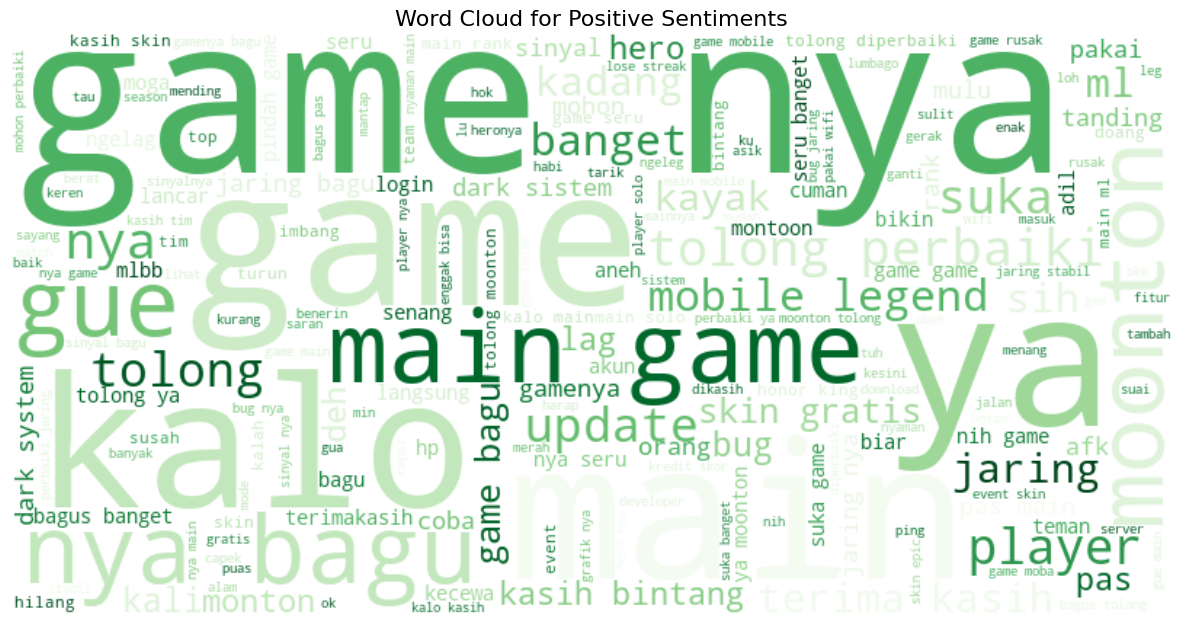

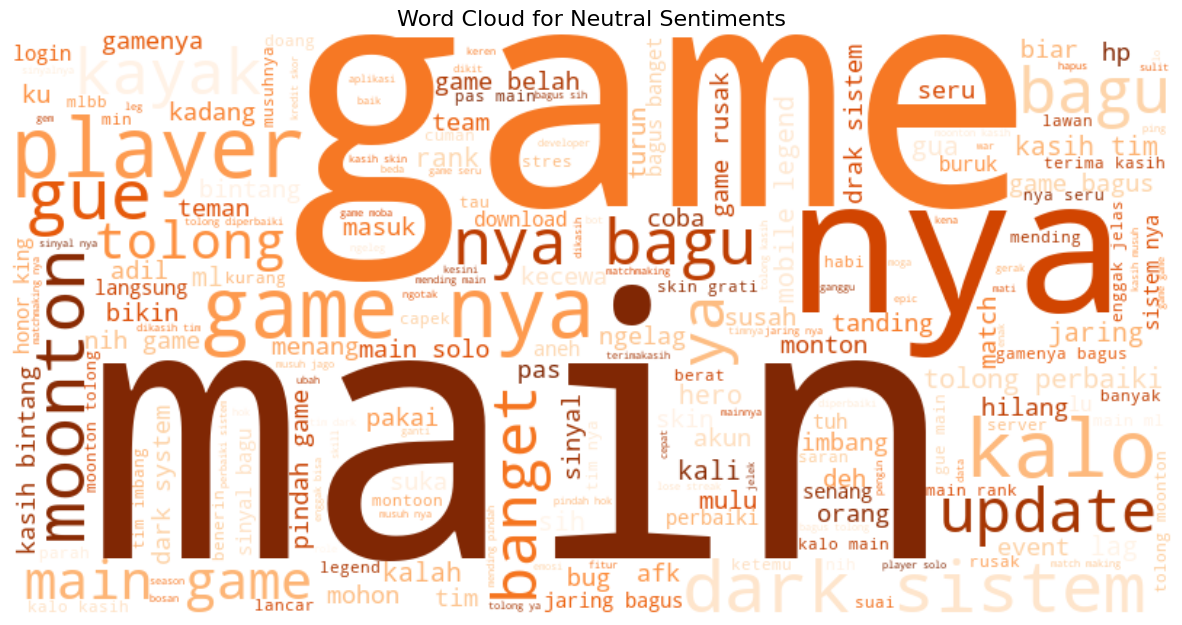

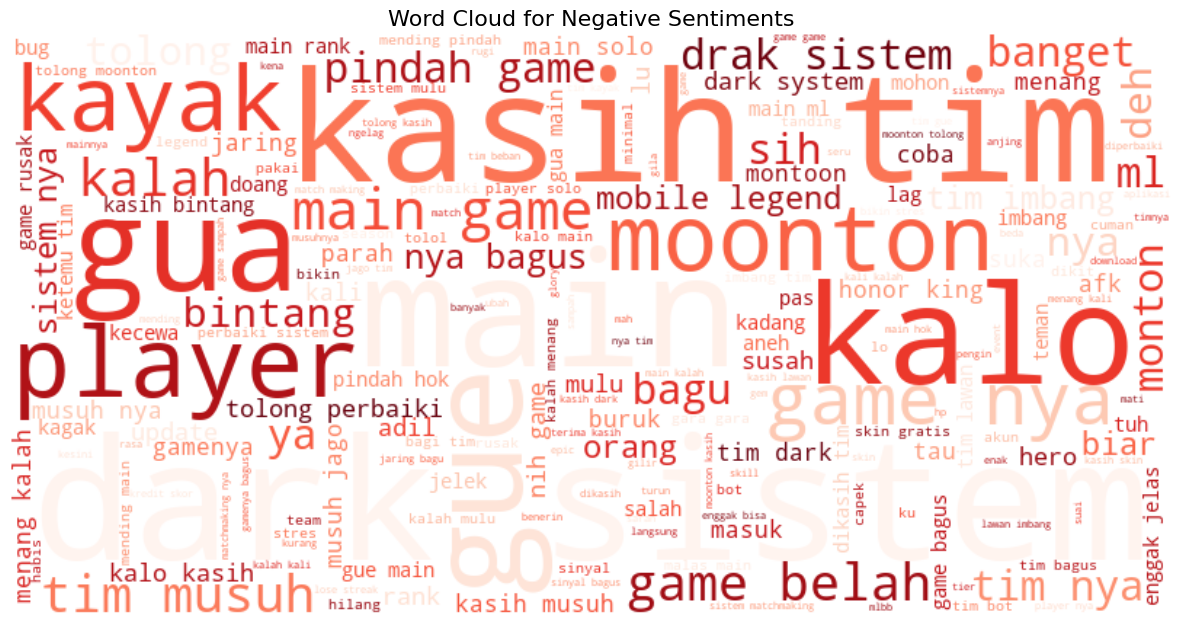

In [57]:
def generate_wordcloud(text, title, color):
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        colormap=color,
        max_words=200
    ).generate(text)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

generate_wordcloud(positive_text, "Word Cloud for Positive Sentiments", "Greens")
generate_wordcloud(neutral_text, "Word Cloud for Neutral Sentiments", "Oranges")
generate_wordcloud(negative_text, "Word Cloud for Negative Sentiments", "Reds")


## Unique Word Count Analysis

In [58]:
data['unique_word_count'] = data['content_clean'].apply(lambda x: len(set(x.split())))

In [59]:
fig_unique = px.histogram(
    data, 
    x='unique_word_count', 
    title='Unique Word Count Distribution',
    nbins=50,
    labels={'unique_word_count': 'Unique Word Count'},
    color_discrete_sequence=['purple']
)

fig_unique.show()

## Sentiment Proportion by Rating

In [60]:
fig_bar_score = px.histogram(
    data, 
    x='score', 
    color='sentiment', 
    barmode='group',
    title='Sentiment by Rating',
    labels={'score': 'Score', 'count': 'Number of Reviews'},
    color_discrete_map={'positive': 'green', 'neutral': 'orange', 'negative': 'red'}
)

fig_bar_score.show()

## Sentiment Over Time

In [61]:
data['date'] = pd.to_datetime(data['at']).dt.date

In [62]:
grouped_data = data.groupby(['date', 'sentiment']).size().reset_index(name='count')

In [63]:
fig_time = px.line(
    grouped_data,
    x='date',
    y='count',
    color='sentiment',
    title='Sentiments Over Time',
    labels={'date': 'Date', 'count': 'Number of Reviews'},
    color_discrete_map={'Positive': 'green', 'Neutral': 'orange', 'Negative': 'red'}
)

fig_time.show()


## Top Frequent Words

In [64]:
def get_top_words(data, sentiment, n=10):
    sentiment_data = data[data['sentiment'] == sentiment]
    all_words = [word for tokens in sentiment_data['content_lemmatized'] for word in tokens]
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

In [65]:
top_positive = get_top_words(data, 'positive', n=10)
top_neutral = get_top_words(data, 'neutral', n=10)
top_negative = get_top_words(data, 'negative', n=10)

In [66]:
df_positive = pd.DataFrame(top_positive, columns=['word', 'count'])

fig_positive = px.bar(
    df_positive,
    x='word',
    y='count',
    title='Top Words for Positive Sentiment',
    labels={'word': 'Word', 'count': 'Frequency'},
    color_discrete_sequence=['green']
)

fig_positive.show()

In [67]:
df_neutral = pd.DataFrame(top_neutral, columns=['word', 'count'])

fig_neutral = px.bar(
    df_neutral,
    x='word',
    y='count',
    title='Top Words for Neutral Sentiment',
    labels={'word': 'Word', 'count': 'Frequency'},
    color_discrete_sequence=['orange']
)
fig_neutral.update_layout(title_x=0.5)
fig_neutral.show()


In [68]:
df_negative = pd.DataFrame(top_negative, columns=['word', 'count'])

fig_negative = px.bar(
    df_negative,
    x='word',
    y='count',
    title='Top Words for Negative Sentiment',
    labels={'word': 'Word', 'count': 'Frequency'},
    color_discrete_sequence=['red']
)

fig_negative.show()

# Data Balancing
In this process, Synthetic Minority Over-sampling Technique (SMOTE) is applied to balance the sentiment classification dataset. SMOTE generates synthetic samples for the minority classes (e.g., neutral or positive sentiment) to ensure a more balanced distribution.

In [69]:
#data['sentiment_label'] = data['sentiment'].map({'negative': 0, 'positive': 1, 'neutral': 2})

In [70]:
#vectorizer = TfidfVectorizer()
#X_tfidf = vectorizer.fit_transform(data['content_clean'])
#y = data['sentiment_label']

In [71]:
#smote = SMOTE(sampling_strategy='auto', random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

In [72]:
#smote_labels = pd.DataFrame({'sentiment_smote': y_resampled})

In [73]:
#data = pd.concat([data, smote_labels.iloc[:len(data)]], axis=1)

In [74]:
#y_resampled.value_counts()

In [75]:
#data.head()

# Feature Extraction

## TF-IDF
10000 feature dimensions

In [76]:
vectorizer_tfidf = TfidfVectorizer(max_features=10000)

In [77]:
X_tfidf = vectorizer_tfidf.fit_transform(data['content_clean'])

In [78]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

In [79]:
tfidf_df['sentiment'] = data['sentiment']

In [80]:
tfidf_df.head()

aa  aamon  abad  abadi  abadisedangkan  abai  abaikan  abal  abang  \
0  0.0    0.0   0.0    0.0             0.0   0.0      0.0   0.0    0.0   
1  0.0    0.0   0.0    0.0             0.0   0.0      0.0   0.0    0.0   
2  0.0    0.0   0.0    0.0             0.0   0.0      0.0   0.0    0.0   
3  0.0    0.0   0.0    0.0             0.0   0.0      0.0   0.0    0.0   
4  0.0    0.0   0.0    0.0             0.0   0.0      0.0   0.0    0.0   

   abangan  ...  𝚋𝚊𝚗𝚐𝚎𝚝  𝚍𝚊𝚛𝚒  𝚐𝚊𝚖𝚎   𝚔𝚞  𝚕𝚊𝚐𝚒  𝚗𝚢𝚊  𝚝𝚊𝚙𝚒  𝚝𝚒𝚖  𝚢𝚊𝚗𝚐  \
0      0.0  ...     0.0   0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
1      0.0  ...     0.0   0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
2      0.0  ...     0.0   0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
3      0.0  ...     0.0   0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
4      0.0  ...     0.0   0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   

   sentiment  
0   negative  
1   positive  
2   positive  
3   negative  
4   positive  

[5 rows x 10001 columns]

In [81]:
label_encoder = LabelEncoder()

In [82]:
tfidf_df['sentiment_numeric'] = label_encoder.fit_transform(tfidf_df['sentiment'])

In [83]:
tfidf_df = tfidf_df.drop(columns=['sentiment'])

In [84]:
tfidf_df.head()

aa  aamon  abad  abadi  abadisedangkan  abai  abaikan  abal  abang  \
0  0.0    0.0   0.0    0.0             0.0   0.0      0.0   0.0    0.0   
1  0.0    0.0   0.0    0.0             0.0   0.0      0.0   0.0    0.0   
2  0.0    0.0   0.0    0.0             0.0   0.0      0.0   0.0    0.0   
3  0.0    0.0   0.0    0.0             0.0   0.0      0.0   0.0    0.0   
4  0.0    0.0   0.0    0.0             0.0   0.0      0.0   0.0    0.0   

   abangan  ...  𝚋𝚊𝚗𝚐𝚎𝚝  𝚍𝚊𝚛𝚒  𝚐𝚊𝚖𝚎   𝚔𝚞  𝚕𝚊𝚐𝚒  𝚗𝚢𝚊  𝚝𝚊𝚙𝚒  𝚝𝚒𝚖  𝚢𝚊𝚗𝚐  \
0      0.0  ...     0.0   0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
1      0.0  ...     0.0   0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
2      0.0  ...     0.0   0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
3      0.0  ...     0.0   0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
4      0.0  ...     0.0   0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   

   sentiment_numeric  
0                  0  
1                  2  
2                  2  
3                  0  
4                  2  

[5 rows x 10001 columns]

## FastText
300 feature dimensions

In [85]:
fasttext_dir = "../models/fasttext_model"

In [86]:
fasttext_path = os.path.join(fasttext_dir, "fasttext.kv")

In [87]:
if not os.path.exists(fasttext_path):
    print("Download model FastText.")
    
    fasttext_model = api.load("fasttext-wiki-news-subwords-300")
    fasttext_model.save(fasttext_path)
    
    print(f"FastText model successfully saved in {fasttext_path}")
else:
    print("FastText model already exists, no need to download.")

FastText model already exists, no need to download.


In [88]:
fasttext_model = KeyedVectors.load(fasttext_path)

In [89]:
def get_fasttext_vector(text):
    words = text.split()
    vectors = [fasttext_model[word] for word in words if word in fasttext_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(300)

In [90]:
data['fasttext_features'] = data['content_clean'].apply(get_fasttext_vector)

In [91]:
fasttext_df = pd.DataFrame(data['fasttext_features'].tolist(), columns=[f'fasttext_{i}' for i in range(300)])

In [92]:
data_with_fasttext = pd.concat([data, fasttext_df], axis=1)

In [93]:
data_with_fasttext.drop(columns=['fasttext_features'], inplace=True)

In [94]:
data_with_fasttext.head()

content  score  \
0  Sepandai apapun kalian bermain,, monoton akan ...      2   
1  Bagus sih tapi cuman ada satu kendala yaitu pa...      5   
2  Tolong Perbaiki lagi sistemnya,tidak classic t...      1   
3  Saya kasi bintang 2 aja, karena apa? Ya karena...      2   
4  Untuk gamenya sudah bagus ya, tapi untuk beber...      1   

                    at                                content_casefolding  \
0  2024-11-14 11:28:50  sepandai apapun kalian bermain,, monoton akan ...   
1  2024-11-09 11:42:00  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  2024-11-13 13:12:53  tolong perbaiki lagi sistemnya,tidak classic t...   
3  2024-11-13 06:54:31  saya kasi bintang 2 aja, karena apa? ya karena...   
4  2024-11-13 13:03:01  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                    content_no_emoji  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                 content_no_mentions  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_hastags  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                     content_no_urls  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_numbers  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang  aja, karena apa? ya karena ...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                              content_no_superscript  ... fasttext_290  \
0  sepandai apapun kalian bermain,, monoton akan ...  ...     0.000137   
1  bagus sih tapi cuman ada satu kendala yaitu pa...  ...    -0.006019   
2  tolong perbaiki lagi sistemnya,tidak classic t...  ...    -0.008871   
3  saya kasi bintang  aja, karena apa? ya karena ...  ...     0.007118   
4  untuk gamenya sudah bagus ya, tapi untuk beber...  ...     0.005118   

  fasttext_291 fasttext_292 fasttext_293 fasttext_294 fasttext_295  \
0    -0.016226    -0.006821    -0.036406     0.031909     0.002584   
1    -0.029615    -0.017245    -0.057885     0.028457     0.035309   
2    -0.034776     0.002189    -0.050306     0.034643     0.012834   
3    -0.009539    -0.015998    -0.051016     0.038078     0.008968   
4    -0.005648    -0.018381    -0.043029     0.033268    -0.011965   

  fasttext_296 fasttext_297 fasttext_298  fasttext_299  
0     0.019430     0.018925     0.004900      0.019133  
1     0.032227     0.011968    -0.002456      0.021207  
2     0.001178     0.008350     0.014357      0.007026  
3     0.024258     0.020067     0.010980      0.026010  
4     0.003300     0.017819    -0.009385      0.032559  

[5 rows x 325 columns]

In [95]:
data.head()

content  score  \
0  Sepandai apapun kalian bermain,, monoton akan ...      2   
1  Bagus sih tapi cuman ada satu kendala yaitu pa...      5   
2  Tolong Perbaiki lagi sistemnya,tidak classic t...      1   
3  Saya kasi bintang 2 aja, karena apa? Ya karena...      2   
4  Untuk gamenya sudah bagus ya, tapi untuk beber...      1   

                    at                                content_casefolding  \
0  2024-11-14 11:28:50  sepandai apapun kalian bermain,, monoton akan ...   
1  2024-11-09 11:42:00  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  2024-11-13 13:12:53  tolong perbaiki lagi sistemnya,tidak classic t...   
3  2024-11-13 06:54:31  saya kasi bintang 2 aja, karena apa? ya karena...   
4  2024-11-13 13:03:01  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                    content_no_emoji  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                 content_no_mentions  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_hastags  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                     content_no_urls  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang 2 aja, karena apa? ya karena...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                                  content_no_numbers  \
0  sepandai apapun kalian bermain,, monoton akan ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...   
2  tolong perbaiki lagi sistemnya,tidak classic t...   
3  saya kasi bintang  aja, karena apa? ya karena ...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...   

                              content_no_superscript  ...  \
0  sepandai apapun kalian bermain,, monoton akan ...  ...   
1  bagus sih tapi cuman ada satu kendala yaitu pa...  ...   
2  tolong perbaiki lagi sistemnya,tidak classic t...  ...   
3  saya kasi bintang  aja, karena apa? ya karena ...  ...   
4  untuk gamenya sudah bagus ya, tapi untuk beber...  ...   

                                content_no_stopwords  \
0  [sepandai, apapun, bermain, monoton, akun, ter...   
1  [bagus, sih, cuman, kendala, pas, main, wifi, ...   
2  [tolong, perbaiki, sistemnyatidak, classic, ra...   
3  [kasih, bintang, ya, tim, tim, musuh, banget, ...   
4  [gamenya, bagus, ya, kekurangan, dianatarnya, ...   

                                  content_lemmatized  \
0  [sepandai, apapun, main, monoton, akun, kena, ...   
1  [bagus, sih, cuman, kendala, pas, main, wifi, ...   
2  [tolong, perbaiki, sistemnyatidak, classic, ra...   
3  [kasih, bintang, ya, tim, tim, musuh, banget, ...   
4  [gamenya, bagus, ya, kurang, dianatarnya, tolo...   

                                       content_clean sentiment_score  \
0  sepandai apapun main monoton akun kena lose st...             -14   
1  bagus sih cuman kendala pas main wifi nya kenc...               1   
2  tolong perbaiki sistemnyatidak classic rank ti...               8   
3  kasih bintang ya tim tim musuh banget beda kay...             -35   
4  gamenya bagus ya kurang dianatarnya tolong jar...               9   

  sentiment sentiment_numeric word_count uni

## IndoBERT
768 feature dimensions

In [96]:
#indobert_dir = "../models/indobert_model"

In [97]:
#os.makedirs(indobert_dir, exist_ok=True)

In [98]:
#if not os.path.exists(os.path.join(indobert_dir, "pytorch_model.bin")):
#    print("Download model IndoBERT.")
#
#    tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
#    model = BertModel.from_pretrained("indobenchmark/indobert-base-p1")
#
#    tokenizer.save_pretrained(indobert_dir)
#    model.save_pretrained(indobert_dir)
#
#    print(f"IndoBERT model successfully saved in {indobert_dir}")
#else:
#    print("IndoBERT model already exists, no need to download.")

In [99]:
#tokenizer = BertTokenizer.from_pretrained(indobert_dir)
#model = BertModel.from_pretrained(indobert_dir)

In [100]:
#def get_bert_embedding(text):
#    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
#
#    with torch.no_grad():
#        outputs = model(**inputs)
#
#    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

In [101]:
#data['bert_features'] = data['content_clean'].apply(get_bert_embedding)

In [102]:
#bert_df = pd.DataFrame(data['bert_features'].tolist(), columns=[f'bert_{i}' for i in range(768)])

In [103]:
#data_with_bert = pd.concat([data, bert_df], axis=1)

In [104]:
#data_with_bert.drop(columns=['bert_features'], inplace=True)

In [105]:
#data_with_bert.head()

In [106]:
#data.head()

# Modeling

In [107]:
MAX_WORDS = 20000
MAX_LENGTH = 100
NUM_CLASSES = 3

In [108]:
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(data['content_clean'])
X_sequences = tokenizer.texts_to_sequences(data['content_clean'])
X_padded = pad_sequences(X_sequences, maxlen=MAX_LENGTH)
y_labels = data['sentiment_numeric'].values

In [109]:
def plot_history(history, model_name):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    # Plot Loss
    axs[0].plot(history.history['loss'], label='Train Loss')
    axs[0].plot(history.history['val_loss'], label='Val Loss')
    axs[0].set_title(f'{model_name} Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    # Plot Accuracy
    axs[1].plot(history.history['accuracy'], label='Train Accuracy')
    axs[1].plot(history.history['val_accuracy'], label='Val Accuracy')
    axs[1].set_title(f'{model_name} Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    plt.tight_layout()
    plt.savefig(f'{model_name}_training_history.png')
    plt.show()

In [110]:
X_tfidf_features = tfidf_df.drop(columns=['sentiment_numeric']).values
y_tfidf = tfidf_df['sentiment_numeric'].values

In [111]:
X_fasttext = fasttext_df.values
y_fasttext = data['sentiment_numeric'].values

## SVM with TF-IDF

In [112]:
X_train_tfidf_svm, X_test_tfidf_svm, y_train_tfidf_svm, y_test_tfidf_svm = train_test_split(
    X_tfidf_features, y_tfidf, test_size=0.2, random_state=42
)

In [113]:
def objective_tfidf_svm(trial):
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])
    C = trial.suggest_float("C", 1e-3, 1e3)
    if kernel == "rbf":
        gamma = trial.suggest_float("gamma", 1e-4, 1e-1)
        model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
    else:
        model = SVC(kernel=kernel, C=C, random_state=42)
    
    model.fit(X_train_tfidf_svm, y_train_tfidf_svm)
    y_pred = model.predict(X_test_tfidf_svm)
    return accuracy_score(y_test_tfidf_svm, y_pred)

In [114]:
study_tfidf_svm = optuna.create_study(direction="maximize")
study_tfidf_svm.optimize(objective_tfidf_svm, n_trials=2)

[I 2025-03-18 00:20:37,103] A new study created in memory with name: no-name-b8406c2c-1d37-4006-b84a-a70149419d3d
[I 2025-03-18 02:04:40,268] Trial 0 finished with value: 0.864 and parameters: {'kernel': 'rbf', 'C': 592.7527999392796, 'gamma': 0.09629579068608833}. Best is trial 0 with value: 0.864.
[I 2025-03-18 03:51:32,482] Trial 1 finished with value: 0.8645 and parameters: {'kernel': 'rbf', 'C': 482.1245153080575, 'gamma': 0.08086497201154003}. Best is trial 1 with value: 0.8645.


In [115]:
joblib.dump(study_tfidf_svm, "../models/svm/tfidf_svm_optuna_study.pkl")

['../models/svm/tfidf_svm_optuna_study.pkl']

In [116]:
print("Best TF-IDF SVM hyperparameters:", study_tfidf_svm.best_params)
print("Best TF-IDF SVM Accuracy (Validation): {:.4f}".format(study_tfidf_svm.best_value))

Best TF-IDF SVM hyperparameters: {'kernel': 'rbf', 'C': 482.1245153080575, 'gamma': 0.08086497201154003}
Best TF-IDF SVM Accuracy (Validation): 0.8645


In [117]:
best_params_tfidf_svm = study_tfidf_svm.best_params

In [118]:
if best_params_tfidf_svm["kernel"] == "rbf":
    best_model_tfidf_svm = SVC(kernel=best_params_tfidf_svm["kernel"], C=best_params_tfidf_svm["C"], gamma=best_params_tfidf_svm["gamma"], random_state=42)
else:
    best_model_tfidf_svm = SVC(kernel=best_params_tfidf_svm["kernel"], C=best_params_tfidf_svm["C"], random_state=42)

In [119]:
best_model_tfidf_svm.fit(X_train_tfidf_svm, y_train_tfidf_svm)

SVC(C=482.1245153080575, gamma=0.08086497201154003, random_state=42)

In [120]:
y_train_pred_tfidf_svm = best_model_tfidf_svm.predict(X_train_tfidf_svm)
y_test_pred_tfidf_svm = best_model_tfidf_svm.predict(X_test_tfidf_svm)

In [121]:
train_acc_tfidf_svm = accuracy_score(y_train_tfidf_svm, y_train_pred_tfidf_svm)
test_acc_tfidf_svm = accuracy_score(y_test_tfidf_svm, y_test_pred_tfidf_svm)

In [122]:
print("TF-IDF + SVM Training Accuracy: {:.4f}".format(train_acc_tfidf_svm))
print("TF-IDF + SVM Testing Accuracy:  {:.4f}".format(test_acc_tfidf_svm))

TF-IDF + SVM Training Accuracy: 1.0000
TF-IDF + SVM Testing Accuracy:  0.8645


In [123]:
print(classification_report(y_test_tfidf_svm, y_test_pred_tfidf_svm))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2359
           1       0.73      0.75      0.74      1524
           2       0.91      0.93      0.92      2117

    accuracy                           0.86      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.87      0.86      0.87      6000



In [124]:
joblib.dump(best_model_tfidf_svm, "../models/svm/best_tfidf_svm_model.pkl")

['../models/svm/best_tfidf_svm_model.pkl']

## SVM with FastText

In [125]:
X_train_fasttext_svm, X_test_fasttext_svm, y_train_fasttext_svm, y_test_fasttext_svm = train_test_split(
    X_fasttext, y_fasttext, test_size=0.2, random_state=42
)

In [126]:
def objective_fasttext_svm(trial):
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])
    C = trial.suggest_float("C", 1e-3, 1e3)
    if kernel == "rbf":
        gamma = trial.suggest_float("gamma", 1e-4, 1e-1)
        model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
    else:
        model = SVC(kernel=kernel, C=C, random_state=42)
    
    model.fit(X_train_fasttext_svm, y_train_fasttext_svm)
    y_pred = model.predict(X_test_fasttext_svm)
    return accuracy_score(y_test_fasttext_svm, y_pred)

In [127]:
study_fasttext_svm = optuna.create_study(direction="maximize")
study_fasttext_svm.optimize(objective_fasttext_svm, n_trials=1)

[I 2025-03-18 06:10:47,285] A new study created in memory with name: no-name-93ea6cfd-b8b4-4eb5-94e0-1ff630ddd5f8
[I 2025-03-18 06:17:09,313] Trial 0 finished with value: 0.6708333333333333 and parameters: {'kernel': 'linear', 'C': 795.2361497994734}. Best is trial 0 with value: 0.6708333333333333.


In [128]:
joblib.dump(study_fasttext_svm, "../models/svm/fasttext_svm_optuna_study.pkl")

['../models/svm/fasttext_svm_optuna_study.pkl']

In [129]:
print("Best FastText SVM hyperparameters:", study_fasttext_svm.best_params)
print("Best FastText SVM Accuracy (Validation): {:.4f}".format(study_fasttext_svm.best_value))

Best FastText SVM hyperparameters: {'kernel': 'linear', 'C': 795.2361497994734}
Best FastText SVM Accuracy (Validation): 0.6708


In [130]:
best_params_fasttext_svm = study_fasttext_svm.best_params

In [131]:
if best_params_fasttext_svm["kernel"] == "rbf":
    best_model_fasttext_svm = SVC(kernel=best_params_fasttext_svm["kernel"], C=best_params_fasttext_svm["C"], gamma=best_params_fasttext_svm["gamma"], random_state=42)
else:
    best_model_fasttext_svm = SVC(kernel=best_params_fasttext_svm["kernel"], C=best_params_fasttext_svm["C"], random_state=42)

In [132]:
best_model_fasttext_svm.fit(X_train_fasttext_svm, y_train_fasttext_svm)

SVC(C=795.2361497994734, kernel='linear', random_state=42)

In [133]:
y_train_pred_fasttext_svm = best_model_fasttext_svm.predict(X_train_fasttext_svm)
y_test_pred_fasttext_svm = best_model_fasttext_svm.predict(X_test_fasttext_svm)

In [134]:
train_acc_fasttext_svm = accuracy_score(y_train_fasttext_svm, y_train_pred_fasttext_svm)
test_acc_fasttext_svm = accuracy_score(y_test_fasttext_svm, y_test_pred_fasttext_svm)

In [135]:
print("FastText + SVM Training Accuracy: {:.4f}".format(train_acc_fasttext_svm))
print("FastText + SVM Testing Accuracy:  {:.4f}".format(test_acc_fasttext_svm))

FastText + SVM Training Accuracy: 0.6848
FastText + SVM Testing Accuracy:  0.6708


In [136]:
print(classification_report(y_test_fasttext_svm, y_test_pred_fasttext_svm))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      2359
           1       0.46      0.28      0.35      1524
           2       0.71      0.80      0.75      2117

    accuracy                           0.67      6000
   macro avg       0.63      0.63      0.62      6000
weighted avg       0.65      0.67      0.65      6000



In [137]:
joblib.dump(best_model_fasttext_svm, "../models/svm/best_fasttext_svm_model.pkl")

['../models/svm/best_fasttext_svm_model.pkl']

## RF with TF-IDF

In [138]:
X_train_tfidf_rf, X_test_tfidf_rf, y_train_tfidf_rf, y_test_tfidf_rf = train_test_split(
    X_tfidf_features, y_tfidf, test_size=0.2, random_state=42
)

In [139]:
def objective_tfidf_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    
    model = RandomForestClassifier(n_estimators=n_estimators, 
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split, 
                                   random_state=42)
    model.fit(X_train_tfidf_rf, y_train_tfidf_rf)
    y_pred = model.predict(X_test_tfidf_rf)
    return accuracy_score(y_test_tfidf_rf, y_pred)

In [140]:
study_tfidf_rf = optuna.create_study(direction="maximize")
study_tfidf_rf.optimize(objective_tfidf_rf, n_trials=5)

[I 2025-03-18 06:24:29,099] A new study created in memory with name: no-name-667d55c5-f920-42d5-be7c-66209990cec8
[I 2025-03-18 06:25:02,889] Trial 0 finished with value: 0.6378333333333334 and parameters: {'n_estimators': 60, 'max_depth': 18, 'min_samples_split': 8}. Best is trial 0 with value: 0.6378333333333334.
[I 2025-03-18 06:27:11,768] Trial 1 finished with value: 0.6363333333333333 and parameters: {'n_estimators': 264, 'max_depth': 15, 'min_samples_split': 7}. Best is trial 0 with value: 0.6378333333333334.
[I 2025-03-18 06:31:26,566] Trial 2 finished with value: 0.6503333333333333 and parameters: {'n_estimators': 278, 'max_depth': 32, 'min_samples_split': 4}. Best is trial 2 with value: 0.6503333333333333.
[I 2025-03-18 06:33:54,474] Trial 3 finished with value: 0.6528333333333334 and parameters: {'n_estimators': 145, 'max_depth': 36, 'min_samples_split': 4}. Best is trial 3 with value: 0.6528333333333334.
[I 2025-03-18 06:34:58,359] Trial 4 finished with value: 0.633333333333

In [141]:
joblib.dump(study_tfidf_rf, "../models/rf/tfidf_rf_optuna_study.pkl")

['../models/rf/tfidf_rf_optuna_study.pkl']

In [142]:
print("Best TF-IDF RF hyperparameters:", study_tfidf_rf.best_params)
print("Best TF-IDF RF Accuracy (Validation): {:.4f}".format(study_tfidf_rf.best_value))

Best TF-IDF RF hyperparameters: {'n_estimators': 145, 'max_depth': 36, 'min_samples_split': 4}
Best TF-IDF RF Accuracy (Validation): 0.6528


In [143]:
best_params_tfidf_rf = study_tfidf_rf.best_params

In [144]:
best_model_tfidf_rf = RandomForestClassifier(n_estimators=best_params_tfidf_rf["n_estimators"],
                                             max_depth=best_params_tfidf_rf["max_depth"],
                                             min_samples_split=best_params_tfidf_rf["min_samples_split"],
                                             random_state=42)

In [145]:
best_model_tfidf_rf.fit(X_train_tfidf_rf, y_train_tfidf_rf)

RandomForestClassifier(max_depth=36, min_samples_split=4, n_estimators=145,
                       random_state=42)

In [146]:
y_train_pred_tfidf_rf = best_model_tfidf_rf.predict(X_train_tfidf_rf)
y_test_pred_tfidf_rf = best_model_tfidf_rf.predict(X_test_tfidf_rf)

In [147]:
train_acc_tfidf_rf = accuracy_score(y_train_tfidf_rf, y_train_pred_tfidf_rf)
test_acc_tfidf_rf = accuracy_score(y_test_tfidf_rf, y_test_pred_tfidf_rf)

In [148]:
print("TF-IDF + Random Forest Training Accuracy: {:.4f}".format(train_acc_tfidf_rf))
print("TF-IDF + Random Forest Testing Accuracy:  {:.4f}".format(test_acc_tfidf_rf))

TF-IDF + Random Forest Training Accuracy: 0.8043
TF-IDF + Random Forest Testing Accuracy:  0.6528


In [149]:
print(classification_report(y_test_tfidf_rf, y_test_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76      2359
           1       0.65      0.01      0.03      1524
           2       0.64      0.84      0.73      2117

    accuracy                           0.65      6000
   macro avg       0.65      0.58      0.51      6000
weighted avg       0.65      0.65      0.56      6000



In [150]:
joblib.dump(best_model_tfidf_rf, "../models/rf/best_tfidf_rf_model.pkl")

['../models/rf/best_tfidf_rf_model.pkl']

## RF with FastText

In [151]:
X_train_fasttext_rf, X_test_fasttext_rf, y_train_fasttext_rf, y_test_fasttext_rf = train_test_split(
    X_fasttext, y_fasttext, test_size=0.2, random_state=42
)

In [152]:
def objective_fasttext_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    
    model = RandomForestClassifier(n_estimators=n_estimators, 
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split, 
                                   random_state=42)
    model.fit(X_train_fasttext_rf, y_train_fasttext_rf)
    y_pred = model.predict(X_test_fasttext_rf)
    return accuracy_score(y_test_fasttext_rf, y_pred)

In [153]:
study_fasttext_rf = optuna.create_study(direction="maximize")
study_fasttext_rf.optimize(objective_fasttext_rf, n_trials=5)

[I 2025-03-18 06:37:26,626] A new study created in memory with name: no-name-19689230-afb3-4f01-be92-c814bdbad8c8
[I 2025-03-18 06:37:57,202] Trial 0 finished with value: 0.6116666666666667 and parameters: {'n_estimators': 69, 'max_depth': 19, 'min_samples_split': 2}. Best is trial 0 with value: 0.6116666666666667.
[I 2025-03-18 06:38:25,598] Trial 1 finished with value: 0.6016666666666667 and parameters: {'n_estimators': 112, 'max_depth': 8, 'min_samples_split': 8}. Best is trial 0 with value: 0.6116666666666667.
[I 2025-03-18 06:38:39,562] Trial 2 finished with value: 0.6003333333333334 and parameters: {'n_estimators': 54, 'max_depth': 8, 'min_samples_split': 4}. Best is trial 0 with value: 0.6116666666666667.
[I 2025-03-18 06:40:46,012] Trial 3 finished with value: 0.6216666666666667 and parameters: {'n_estimators': 264, 'max_depth': 28, 'min_samples_split': 8}. Best is trial 3 with value: 0.6216666666666667.
[I 2025-03-18 06:41:42,266] Trial 4 finished with value: 0.599166666666666

In [154]:
joblib.dump(study_fasttext_rf, "../models/rf/fasttext_rf_optuna_study.pkl")

['../models/rf/fasttext_rf_optuna_study.pkl']

In [155]:
print("Best FastText RF hyperparameters:", study_fasttext_rf.best_params)
print("Best FastText RF Accuracy (Validation): {:.4f}".format(study_fasttext_rf.best_value))

Best FastText RF hyperparameters: {'n_estimators': 264, 'max_depth': 28, 'min_samples_split': 8}
Best FastText RF Accuracy (Validation): 0.6217


In [156]:
best_params_fasttext_rf = study_fasttext_rf.best_params

In [157]:
best_model_fasttext_rf = RandomForestClassifier(n_estimators=best_params_fasttext_rf["n_estimators"],
                                                max_depth=best_params_fasttext_rf["max_depth"],
                                                min_samples_split=best_params_fasttext_rf["min_samples_split"],
                                                random_state=42)

In [158]:
best_model_fasttext_rf.fit(X_train_fasttext_rf, y_train_fasttext_rf)

RandomForestClassifier(max_depth=28, min_samples_split=8, n_estimators=264,
                       random_state=42)

In [159]:
y_train_pred_fasttext_rf = best_model_fasttext_rf.predict(X_train_fasttext_rf)
y_test_pred_fasttext_rf = best_model_fasttext_rf.predict(X_test_fasttext_rf)

In [160]:
train_acc_fasttext_rf = accuracy_score(y_train_fasttext_rf, y_train_pred_fasttext_rf)
test_acc_fasttext_rf = accuracy_score(y_test_fasttext_rf, y_test_pred_fasttext_rf)

In [161]:
print("FastText + Random Forest Training Accuracy: {:.4f}".format(train_acc_fasttext_rf))
print("FastText + Random Forest Testing Accuracy:  {:.4f}".format(test_acc_fasttext_rf))

FastText + Random Forest Training Accuracy: 0.9943
FastText + Random Forest Testing Accuracy:  0.6217


In [162]:
print(classification_report(y_test_fasttext_rf, y_test_pred_fasttext_rf))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      2359
           1       0.46      0.15      0.23      1524
           2       0.60      0.80      0.68      2117

    accuracy                           0.62      6000
   macro avg       0.58      0.57      0.54      6000
weighted avg       0.59      0.62      0.58      6000



In [163]:
joblib.dump(best_model_fasttext_rf, "../models/rf/best_fasttext_rf_model.pkl")

['../models/rf/best_fasttext_rf_model.pkl']

## CNN

In [164]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_padded, y_labels, test_size=0.2, random_state=42)

In [165]:
def objective_cnn(trial):
    filters = trial.suggest_categorical("filters", [128, 256])
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    dropout_rate = trial.suggest_float("dropout", 0.1, 1.0)
    l2_lambda = trial.suggest_float("l2_lambda", 1e-4, 1e-2, log=True)
    
    model = Sequential([
        Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LENGTH),
        Conv1D(filters=filters, kernel_size=5, activation='relu', kernel_regularizer=L2(l2_lambda)),
        GlobalMaxPooling1D(),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=L2(l2_lambda)),
        Dropout(dropout_rate),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test_cnn),
              verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])
    
    _, accuracy = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
    return accuracy

In [166]:
study_cnn = optuna.create_study(direction="maximize")
study_cnn.optimize(objective_cnn, n_trials=5)

[I 2025-03-18 06:43:48,021] A new study created in memory with name: no-name-49994584-be48-47f3-b671-110df102473b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.

[I 2025-03-18 06:45:15,438] Trial 0 finished with value: 0.7713333368301392 and parameters: {'filters': 256, 'learning_rate': 0.0030095305973737176, 'dropout': 0.7059189361545645, 'l2_lambda': 0.002423911156753883}. Best is trial 0 with value: 0.7713333368301392.
[I 2025-03-18 06:47:19,978] Trial 1 finished with value: 0.7768333554267883 and parameters: {'filters': 256, 'learning_rate': 0.0007150771295458666, 'dropout': 0.8028549652634742, 'l2_lambda': 0.0009141635656890229}. Best is trial 1 with value: 0.7768333554267883.
[I 2025-03-18 06:48:43,429] Trial 2 finished with value: 0.7676666378974915 and parameters: {'filters': 256, 'learning_rate': 0.006293510624665486, 'dropout': 0.4915198

In [167]:
joblib.dump(study_cnn, "../models/cnn/cnn_optuna_study.pkl")

['../models/cnn/cnn_optuna_study.pkl']

In [168]:
print(f"Best CNN Hyperparameters: {study_cnn.best_params}")
print(f"Best CNN Accuracy: {study_cnn.best_value:.4f}")

Best CNN Hyperparameters: {'filters': 128, 'learning_rate': 0.00037167169480808646, 'dropout': 0.1698330339848284, 'l2_lambda': 0.00011092391515447004}
Best CNN Accuracy: 0.8145


In [169]:
best_params_cnn = study_cnn.best_params

In [170]:
cnn_best = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LENGTH),
    Conv1D(filters=best_params_cnn['filters'], kernel_size=5, activation='relu', kernel_regularizer=L2(best_params_cnn['l2_lambda'])),
    GlobalMaxPooling1D(),
    Dropout(best_params_cnn['dropout']),
    Dense(64, activation='relu', kernel_regularizer=L2(best_params_cnn['l2_lambda'])),
    Dropout(best_params_cnn['dropout']),
    Dense(NUM_CLASSES, activation='softmax')
])

In [171]:
cnn_best.compile(optimizer=Adam(learning_rate=best_params_cnn['learning_rate']), 
                 loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [172]:
history_cnn = cnn_best.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=64, 
                           validation_data=(X_test_cnn, y_test_cnn), 
                           callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)], verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.5555 - loss: 0.9441 - val_accuracy: 0.7672 - val_loss: 0.5513
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.7997 - loss: 0.4915 - val_accuracy: 0.8107 - val_loss: 0.4562
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.8710 - loss: 0.3548 - val_accuracy: 0.8160 - val_loss: 0.4469
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9088 - loss: 0.2755 - val_accuracy: 0.8173 - val_loss: 0.4597
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9347 - loss: 0.2110 - val_accuracy: 0.8152 - val_loss: 0.4924


In [173]:
train_loss_cnn, train_acc_cnn = cnn_best.evaluate(X_train_cnn, y_train_cnn, verbose=0)
test_loss_cnn, test_acc_cnn = cnn_best.evaluate(X_test_cnn, y_test_cnn, verbose=0)

In [174]:
print(f"CNN Training Accuracy: {train_acc_cnn:.4f}")
print(f"CNN Testing Accuracy: {test_acc_cnn:.4f}")

CNN Training Accuracy: 0.9360
CNN Testing Accuracy: 0.8160


In [175]:
cnn_best.save("../models/cnn/best_cnn_model.h5")

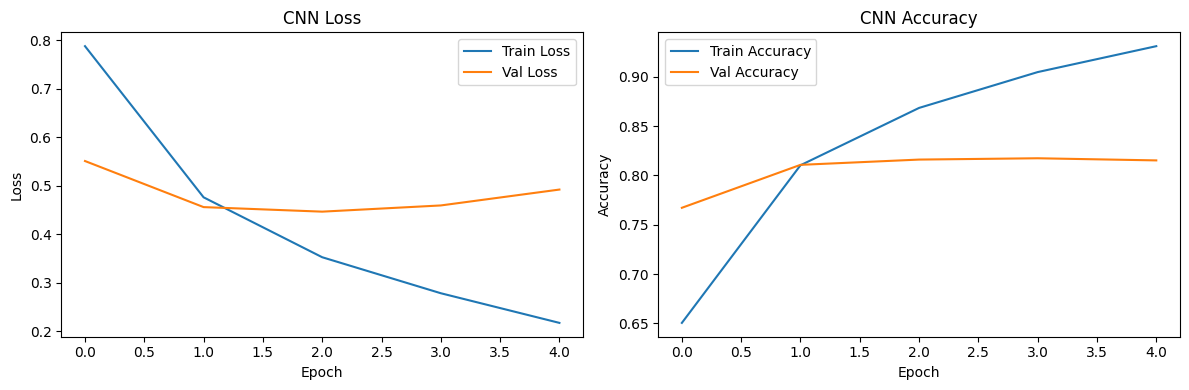

In [176]:
plot_history(history_cnn, "CNN")

## LSTM

In [177]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_padded, y_labels, test_size=0.2, random_state=42)

In [178]:
def objective_lstm(trial):
    lstm_units = trial.suggest_categorical("lstm_units", [128, 256])
    dropout_rate = trial.suggest_float("dropout", 0.1, 1.0)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 5e-3, log=True)
    l2_lambda = trial.suggest_float("l2_lambda", 1e-4, 1e-2, log=True)
    
    model = Sequential([
        Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LENGTH),
        Bidirectional(LSTM(lstm_units, return_sequences=True, dropout=dropout_rate, kernel_regularizer=L2(l2_lambda))),
        Bidirectional(LSTM(lstm_units // 2, dropout=dropout_rate, kernel_regularizer=L2(l2_lambda))),
        Dense(64, activation='relu', kernel_regularizer=L2(l2_lambda)),
        Dropout(dropout_rate),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test_lstm), 
              verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])
    
    _, accuracy = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
    return accuracy

In [179]:
study_lstm = optuna.create_study(direction="maximize")
study_lstm.optimize(objective_lstm, n_trials=5)

[I 2025-03-18 06:54:31,685] A new study created in memory with name: no-name-35f5b4fd-d4d1-4e9b-8788-19bbee4c0e7a
[I 2025-03-18 07:02:35,293] Trial 0 finished with value: 0.8715000152587891 and parameters: {'lstm_units': 128, 'dropout': 0.6076943584265476, 'learning_rate': 0.002163102820267518, 'l2_lambda': 0.0001880828700362327}. Best is trial 0 with value: 0.8715000152587891.
[I 2025-03-18 07:21:17,451] Trial 1 finished with value: 0.3931666612625122 and parameters: {'lstm_units': 128, 'dropout': 0.972055796726296, 'learning_rate': 0.000144486418836111, 'l2_lambda': 0.0002783129949166085}. Best is trial 0 with value: 0.8715000152587891.
[I 2025-03-18 07:46:16,137] Trial 2 finished with value: 0.8676666617393494 and parameters: {'lstm_units': 256, 'dropout': 0.7177359808577966, 'learning_rate': 0.0002987089247870732, 'l2_lambda': 0.007608464188105941}. Best is trial 0 with value: 0.8715000152587891.
[I 2025-03-18 08:04:16,217] Trial 3 finished with value: 0.8971666693687439 and parame

In [180]:
joblib.dump(study_lstm, "../models/lstm/lstm_optuna_study.pkl")

['../models/lstm/lstm_optuna_study.pkl']

In [181]:
print(f"Best LSTM Hyperparameters: {study_lstm.best_params}")
print(f"Best LSTM Accuracy: {study_lstm.best_value:.4f}")

Best LSTM Hyperparameters: {'lstm_units': 128, 'dropout': 0.7109315843946487, 'learning_rate': 0.00015401289027549715, 'l2_lambda': 0.009816154051707809}
Best LSTM Accuracy: 0.8972


In [182]:
best_params_lstm = study_lstm.best_params

In [183]:
lstm_best = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LENGTH),
    Bidirectional(LSTM(best_params_lstm['lstm_units'], return_sequences=True, dropout=best_params_lstm['dropout'], kernel_regularizer=L2(best_params_lstm['l2_lambda']))),
    Bidirectional(LSTM(best_params_lstm['lstm_units'] // 2, dropout=best_params_lstm['dropout'], kernel_regularizer=L2(best_params_lstm['l2_lambda']))),
    Dense(64, activation='relu', kernel_regularizer=L2(best_params_lstm['l2_lambda'])),
    Dropout(best_params_lstm['dropout']),
    Dense(NUM_CLASSES, activation='softmax')
])

In [184]:
lstm_best.compile(optimizer=Adam(learning_rate=best_params_lstm['learning_rate']),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [185]:
history_lstm = lstm_best.fit(X_train_lstm, y_train_lstm, epochs=15, batch_size=64, validation_data=(X_test_lstm, y_test_lstm),
                             callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)], verbose=1)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 110s 279ms/step - accuracy: 0.3784 - loss: 8.0560 - val_accuracy: 0.5233 - val_loss: 2.8380
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 105s 279ms/step - accuracy: 0.6084 - loss: 2.1581 - val_accuracy: 0.7395 - val_loss: 0.9495
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 277ms/step - accuracy: 0.7596 - loss: 0.8778 - val_accuracy: 0.8318 - val_loss: 0.5620
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 105s 280ms/step - accuracy: 0.8266 - loss: 0.5769 - val_accuracy: 0.8610 - val_loss: 0.4525
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 278ms/step - accuracy: 0.8662 - loss: 0.4543 - val_accuracy: 0.8842 - val_loss: 0.3860
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 277ms/step - accuracy: 0.8790 - loss: 0.4000 - val_accuracy: 0.8775 - val_loss: 0.3638
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 138s 266ms/step - accuracy: 0.8970 - loss: 0.3504 - val_accuracy: 0.8825 - val_loss: 0.3512
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 103s 274ms/step - accuracy: 0.9065 -

In [186]:
train_loss_lstm, train_acc_lstm = lstm_best.evaluate(X_train_lstm, y_train_lstm, verbose=0)
test_loss_lstm, test_acc_lstm = lstm_best.evaluate(X_test_lstm, y_test_lstm, verbose=0)

In [187]:
print(f"LSTM Training Accuracy: {train_acc_lstm:.4f}")
print(f"LSTM Testing Accuracy: {test_acc_lstm:.4f}")

LSTM Training Accuracy: 0.9803
LSTM Testing Accuracy: 0.9028


In [188]:
lstm_best.save("../models/lstm/best_lstm_model.h5")

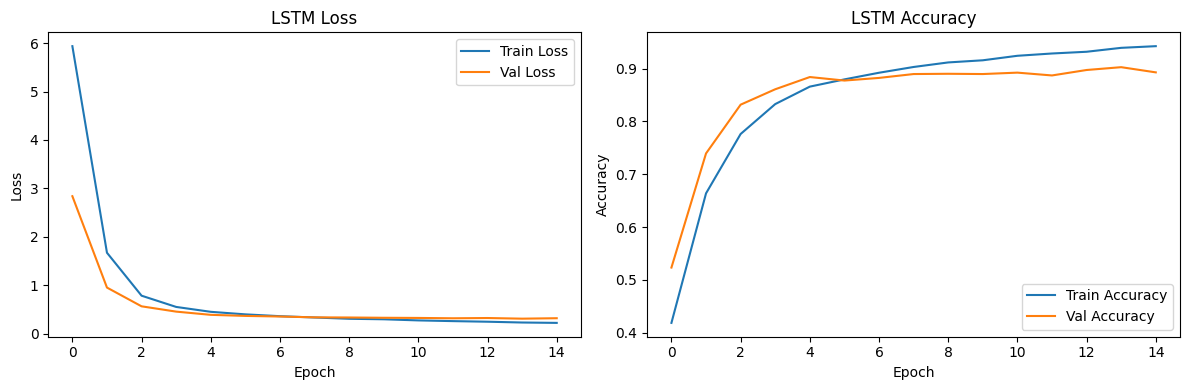

In [189]:
plot_history(history_lstm, "LSTM")

## GRU

In [190]:
X_train_gru, X_test_gru, y_train_gru, y_test_gru = train_test_split(X_padded, y_labels, test_size=0.2, random_state=42)

In [191]:
def objective_gru(trial):
    gru_units = trial.suggest_categorical("gru_units", [128, 256])
    dropout_rate = trial.suggest_float("dropout", 0.1, 1.0)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 5e-3, log=True)
    l2_lambda = trial.suggest_float("l2_lambda", 1e-4, 1e-2, log=True)
    
    model = Sequential([
        Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LENGTH),
        Bidirectional(GRU(gru_units, return_sequences=True, dropout=dropout_rate, kernel_regularizer=L2(l2_lambda))),
        Bidirectional(GRU(gru_units // 2, dropout=dropout_rate, kernel_regularizer=L2(l2_lambda))),
        Dense(64, activation='relu', kernel_regularizer=L2(l2_lambda)),
        Dropout(dropout_rate),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train_gru, y_train_gru, epochs=10, batch_size=64, validation_data=(X_test_gru, y_test_gru),
              verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])
    
    _, accuracy = model.evaluate(X_test_gru, y_test_gru, verbose=0)
    return accuracy

In [192]:
study_gru = optuna.create_study(direction="maximize")
study_gru.optimize(objective_gru, n_trials=5)

[I 2025-03-18 08:42:46,492] A new study created in memory with name: no-name-e4b7feff-d6f7-4f12-aff1-1c5f01060278
[I 2025-03-18 09:24:01,227] Trial 0 finished with value: 0.8939999938011169 and parameters: {'gru_units': 256, 'dropout': 0.7172505000318428, 'learning_rate': 0.0001157017170974438, 'l2_lambda': 0.00011000203379348818}. Best is trial 0 with value: 0.8939999938011169.
[I 2025-03-18 09:33:31,167] Trial 1 finished with value: 0.3931666612625122 and parameters: {'gru_units': 128, 'dropout': 0.7092056286120573, 'learning_rate': 0.0019622110626976944, 'l2_lambda': 0.008754543441400323}. Best is trial 0 with value: 0.8939999938011169.
[I 2025-03-18 10:04:28,990] Trial 2 finished with value: 0.8920000195503235 and parameters: {'gru_units': 256, 'dropout': 0.6218228414356003, 'learning_rate': 0.00023497838339512852, 'l2_lambda': 0.00016643005523597835}. Best is trial 0 with value: 0.8939999938011169.
[I 2025-03-18 10:22:23,204] Trial 3 finished with value: 0.8934999704360962 and par

In [193]:
joblib.dump(study_gru, "../models/gru/gru_optuna_study.pkl")

['../models/gru/gru_optuna_study.pkl']

In [194]:
print(f"Best GRU Hyperparameters: {study_gru.best_params}")
print(f"Best GRU Accuracy: {study_gru.best_value:.4f}")

Best GRU Hyperparameters: {'gru_units': 256, 'dropout': 0.7172505000318428, 'learning_rate': 0.0001157017170974438, 'l2_lambda': 0.00011000203379348818}
Best GRU Accuracy: 0.8940


In [195]:
best_params_gru = study_gru.best_params

In [196]:
gru_best = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LENGTH),
    Bidirectional(GRU(best_params_gru['gru_units'], return_sequences=True, dropout=best_params_gru['dropout'], kernel_regularizer=L2(best_params_gru['l2_lambda']))),
    Bidirectional(GRU(best_params_gru['gru_units'] // 2, dropout=best_params_gru['dropout'], kernel_regularizer=L2(best_params_gru['l2_lambda']))),
    Dense(64, activation='relu', kernel_regularizer=L2(best_params_gru['l2_lambda'])),
    Dropout(best_params_gru['dropout']),
    Dense(NUM_CLASSES, activation='softmax')
])

In [197]:
gru_best.compile(optimizer=Adam(learning_rate=best_params_gru['learning_rate']),
                 loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [198]:
history_gru = gru_best.fit(X_train_gru, y_train_gru, epochs=15, batch_size=64, validation_data=(X_test_gru, y_test_gru),
                           callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)], verbose=1)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 342s 893ms/step - accuracy: 0.3748 - loss: 1.2200 - val_accuracy: 0.5935 - val_loss: 0.9560
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 357s 953ms/step - accuracy: 0.6264 - loss: 0.8988 - val_accuracy: 0.7538 - val_loss: 0.6159
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 322s 858ms/step - accuracy: 0.7489 - loss: 0.6456 - val_accuracy: 0.8087 - val_loss: 0.5001
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 325s 868ms/step - accuracy: 0.7994 - loss: 0.5389 - val_accuracy: 0.8567 - val_loss: 0.4169
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 298s 794ms/step - accuracy: 0.8345 - loss: 0.4675 - val_accuracy: 0.8650 - val_loss: 0.3857
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 285s 760ms/step - accuracy: 0.8640 - loss: 0.4088 - val_accuracy: 0.8693 - val_loss: 0.3752
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 293s 781ms/step - accuracy: 0.8790 - loss: 0.3732 - val_accuracy: 0.8715 - val_loss: 0.3571
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 287s 765ms/step - accuracy: 0.8902 -

In [199]:
train_loss_gru, train_acc_gru = gru_best.evaluate(X_train_gru, y_train_gru, verbose=0)
test_loss_gru, test_acc_gru = gru_best.evaluate(X_test_gru, y_test_gru, verbose=0)

In [200]:
print(f"GRU Training Accuracy: {train_acc_gru:.4f}")
print(f"GRU Testing Accuracy: {test_acc_gru:.4f}")

GRU Training Accuracy: 0.9761
GRU Testing Accuracy: 0.8987


In [201]:
gru_best.save("../models/gru/best_gru_model.h5")

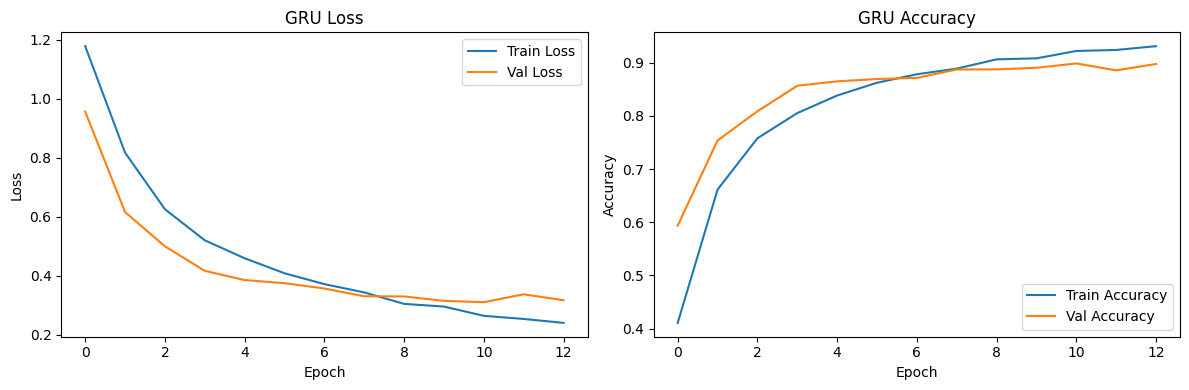

In [202]:
plot_history(history_gru, "GRU")

# Evaluation

## Accuracy Testing & Training

In [203]:
data_acc = {
    "Model": [
        "SVM TF-IDF", "SVM TF-IDF",
        "SVM FastText", "SVM FastText",
        "RF TF-IDF", "RF TF-IDF",
        "RF FastText", "RF FastText",
        "CNN", "CNN",
        "LSTM", "LSTM",
        "GRU", "GRU"
    ],
    "Dataset": [
        "Train", "Test",
        "Train", "Test",
        "Train", "Test",
        "Train", "Test",
        "Train", "Test",
        "Train", "Test",
        "Train", "Test"
    ],
    "Accuracy": [
        train_acc_tfidf_svm, test_acc_tfidf_svm,
        train_acc_fasttext_svm, test_acc_fasttext_svm,
        train_acc_tfidf_rf, test_acc_tfidf_rf,
        train_acc_fasttext_rf, test_acc_fasttext_rf,
        train_acc_cnn, test_acc_cnn,
        train_acc_lstm, test_acc_lstm,
        train_acc_gru, test_acc_gru
    ]
}

In [204]:
df_acc = pd.DataFrame(data_acc)

In [205]:
model_order = ["SVM TF-IDF", "SVM FastText", "RF TF-IDF", "RF FastText", "CNN", "LSTM", "GRU"]
df_acc["Model"] = pd.Categorical(df_acc["Model"], categories=model_order, ordered=True)

In [206]:
fig = px.bar(
    df_acc,
    x="Model",
    y="Accuracy",
    color="Dataset",
    barmode="group",
    title="Comparison of Training and Testing Accuracy",
    text="Accuracy"
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()